In [319]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [320]:
# Import dataset
df = pd.read_csv('Performance Task Dataset.csv')

In [321]:
# Check for missing values
missing_values_total = df.isnull().sum().sum()
print(missing_values_total)

0


In [322]:
# Create matrix of features and dependent variable vector
X = df.iloc[:, list(range(0, 4)) + list(range(5, df.shape[1]))].values
y = df.iloc[:, 4].values

In [323]:
# Encode categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
X_transformed = ct.fit_transform(X).toarray()

In [324]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 1)

In [325]:
# Training the multiple linear regression model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [371]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

In [370]:
# Analyze the performance of the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.38154685212482214
R-squared: 0.9812610325244797


In [327]:
print(regressor.coef_)
coefficients = regressor.coef_
selected_coefficients = coefficients[28:]
print(selected_coefficients)

[-0.18 -0.03  0.16  0.04 -0.05 -0.21  0.07 -0.09  0.11  0.01  0.08 -0.14  0.06 -0.04 -0.06  0.21  0.02  0.04 -0.11  0.06 -0.08  0.2   0.02 -0.13  0.1  -0.08  0.    0.    0.24  0.25  0.26  0.23 -0.1 ]
[ 0.24  0.25  0.26  0.23 -0.1 ]


In [466]:
# Perform feature importance analysis
feature_importance = pd.DataFrame(regressor.coef_, columns=["Coefficient"], index=ct.get_feature_names_out())
print(feature_importance.sort_values(by="Coefficient", ascending=False))

                                       Coefficient
remainder__x6                             0.264913
remainder__x5                             0.248956
remainder__x4                             0.238539
remainder__x7                             0.225782
encoder__x1_IDEA College Prep South 2     0.206401
encoder__x1_IDEA College Prep West 2      0.203014
encoder__x0_South Region                  0.159567
encoder__x1_IDEA College Prep East 5      0.105065
encoder__x1_IDEA College Prep West 5      0.102582
encoder__x1_IDEA College Prep North 2     0.078944
encoder__x1_IDEA College Prep East 3      0.068554
encoder__x1_IDEA College Prep South 6     0.064001
encoder__x1_IDEA College Prep North 4     0.059991
encoder__x0_West Region                   0.042587
encoder__x1_IDEA College Prep South 4     0.037799
encoder__x1_IDEA College Prep West 3      0.022905
encoder__x1_IDEA College Prep South 3     0.016271
encoder__x1_IDEA College Prep North 1     0.008184
remainder__x2                  

In [328]:
mean_of_columns = df.iloc[:, 5:9].mean()
print(mean_of_columns)

print(21 - mean_of_columns)

Highest English        18.678872
Highest Mathematics    18.596038
Highest Reading        20.436975
Highest Science        20.097239
dtype: float64
Highest English        2.321128
Highest Mathematics    2.403962
Highest Reading        0.563025
Highest Science        0.902761
dtype: float64


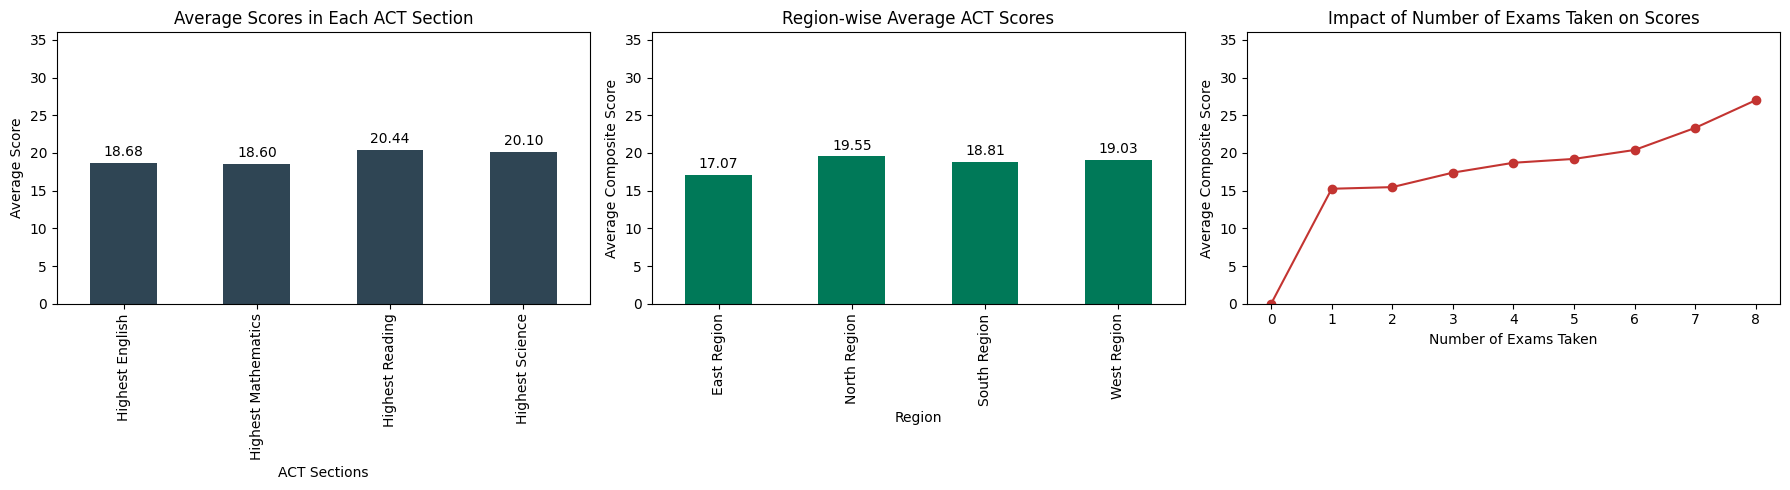

In [420]:
# Calculate the average ACT score for the Class of 2024
class_of_2024 = df[df['Class Year'] == 2024]
average_act_2024 = class_of_2024['Highest Composite'].mean()

average_act_2024

# Analysis of ACT section scores
sections = ['Highest English', 'Highest Mathematics', 'Highest Reading', 'Highest Science']

# Plotting the average scores in each ACT section for Class of 2024
average_scores_by_section = class_of_2024[sections].mean()

# Analysis of region-wise performance
average_scores_by_region = class_of_2024.groupby('Region')['Highest Composite'].mean()

# Analysis of the impact of the number of exams taken
average_scores_by_exam_count = class_of_2024.groupby('Number Exams Taken')['Highest Composite'].mean()

# Creating plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for Section-wise Average Scores
average_scores_by_section.plot(kind='bar', ax=axes[0], color='#2F4554')
axes[0].set_title('Average Scores in Each ACT Section')
axes[0].set_ylabel('Average Score')
axes[0].set_ylim(0, 36)
axes[0].set_xlabel('ACT Sections')

# Add labels on top of the bars for Section-wise Average Scores
for i, v in enumerate(average_scores_by_section):
    axes[0].text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom')

# Plot for Region-wise Average Scores
average_scores_by_region.plot(kind='bar', ax=axes[1], color='#007958')
axes[1].set_title('Region-wise Average ACT Scores')
axes[1].set_ylabel('Average Composite Score')
axes[1].set_ylim(0, 36)
axes[1].set_xlabel('Region')

# Add labels on top of the bars for Region-wise Average Scores
for i, v in enumerate(average_scores_by_region):
    axes[1].text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom')

# Plot for Exam Count Impact on Scores
average_scores_by_exam_count.plot(kind='line', ax=axes[2], marker='o', color='#C33431')
axes[2].set_title('Impact of Number of Exams Taken on Scores')
axes[2].set_ylabel('Average Composite Score')
axes[2].set_xlabel('Number of Exams Taken')
axes[2].set_ylim(0, 36)

plt.tight_layout()
plt.show()

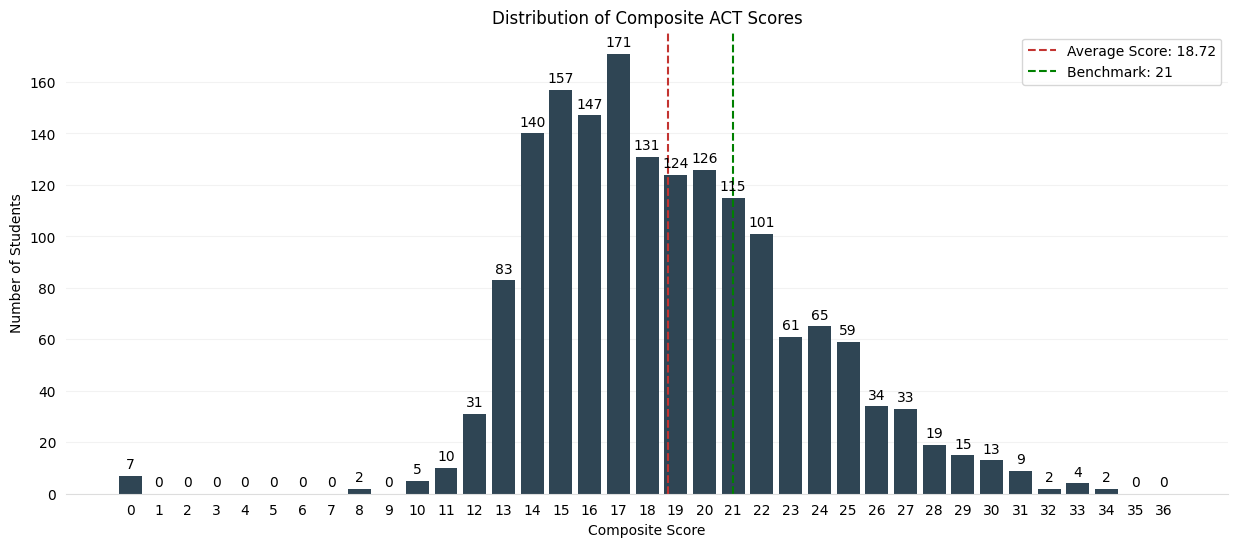

In [368]:
# Bar graph to show the distribution of composite ACT scores

# Calculate the counts for each score (from 0 to 36)
score_counts = [df['Highest Composite'].eq(i).sum() for i in range(0, 37)]

# Calculate the average score
average_score = sum(i * count for i, count in enumerate(score_counts)) / sum(score_counts)

# Create bar chart
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(
    x=range(0, 37),
    height=score_counts,
    color='#2F4554'
)

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

# Vertical line to show average score
ax.axvline(x=average_score, color='#C33431', linestyle='--', label=f'Average Score: {average_score:.2f}')

# Vertical line to show ACT goal
ax.axvline(x=21, color='green', linestyle='--', label=f'Benchmark: {21}')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Title and labels
ax.set_title('Distribution of Composite ACT Scores')
ax.set_xlabel('Composite Score')
ax.set_ylabel('Number of Students')

ax.set_xticks(range(0, 37))
ax.grid(axis='y', alpha=0.75)

plt.legend()
plt.show()

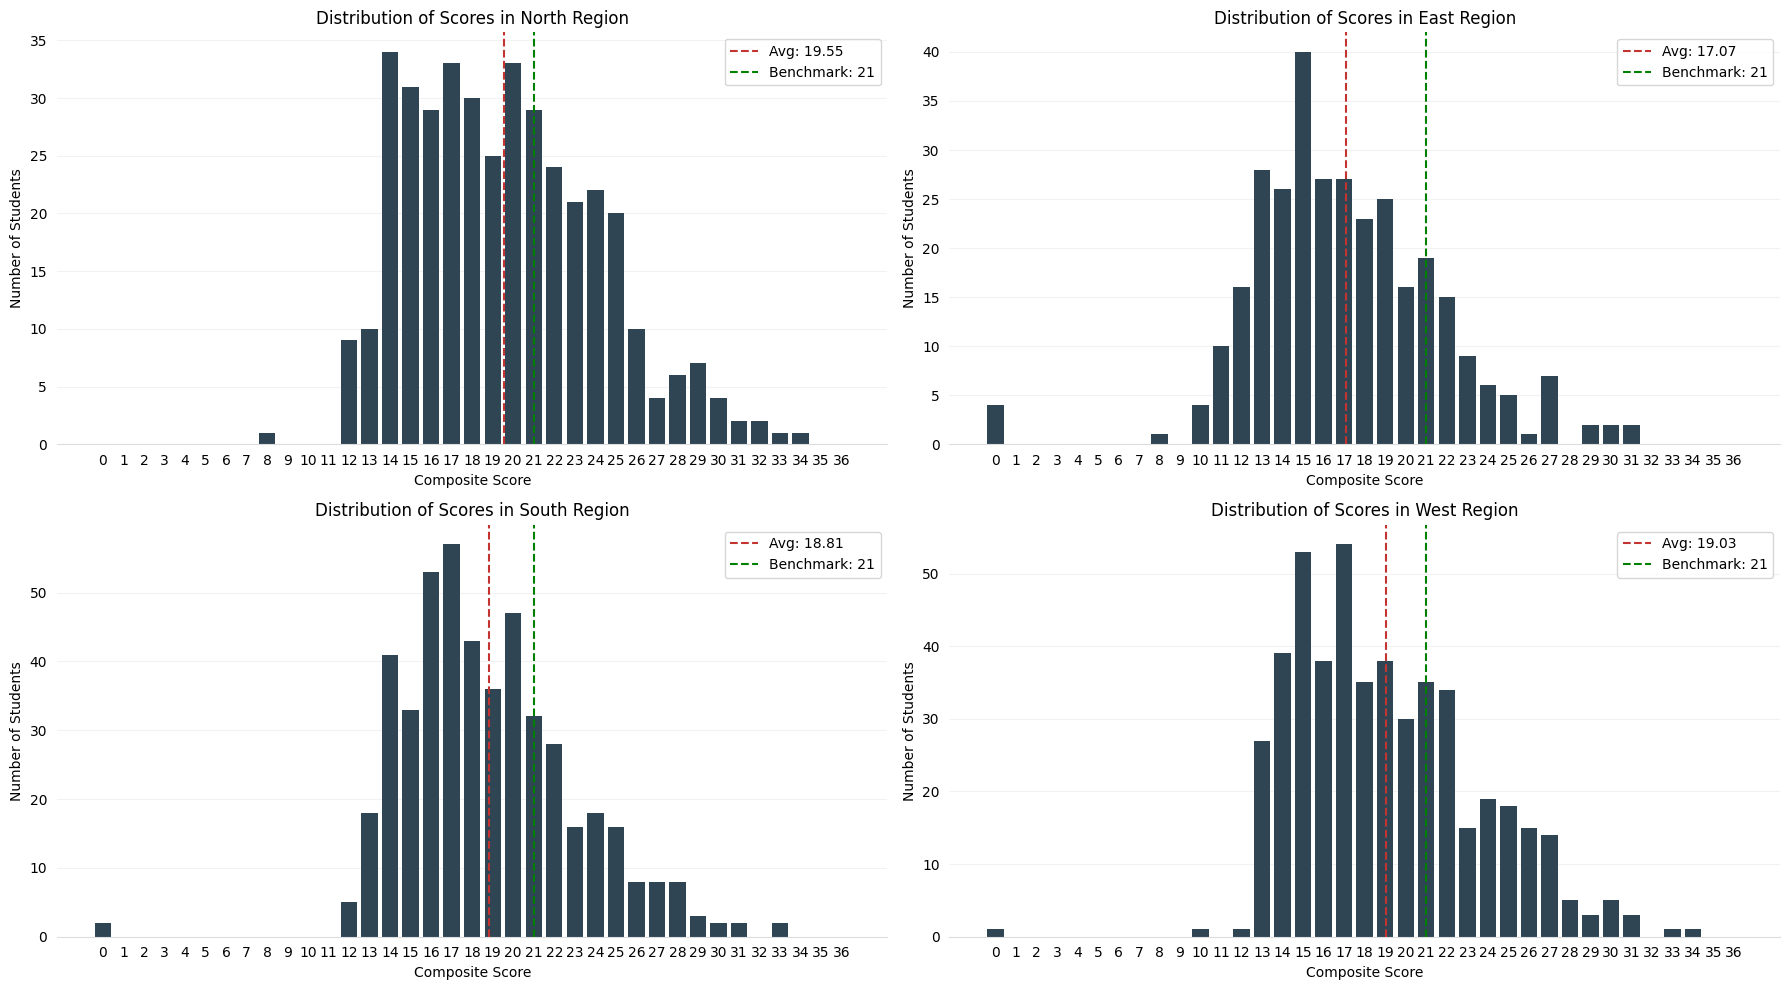

In [379]:
import matplotlib.pyplot as plt
import numpy as np

# Define unique regions
unique_regions = ['North Region', 'East Region', 'South Region', 'West Region']

# Create subplots with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2x2 grid into a 1D array for easy iteration

# Iterate through regions and create histogram plots
for i, region in enumerate(unique_regions):
    region_data = df[df['Region'] == region]
    
    # Calculate the counts for each score (from 0 to 36) for the specific region
    score_counts = [region_data['Highest Composite'].eq(i).sum() for i in range(0, 37)]
    
    # Calculate the average score for the specific region
    average_score = sum(i * count for i, count in enumerate(score_counts)) / sum(score_counts)
    
    # Create bar chart for the specific region
    bars = axes[i].bar(
        x=range(0, 37),
        height=score_counts,
        color='#2F4554'
    )
    
    # Add vertical line for the average score in the specific region
    axes[i].axvline(x=average_score, color='#C33431', linestyle='--', label=f'Avg: {average_score:.2f}')
    
    # Add vertical line for the benchmark score
    axes[i].axvline(x=21, color='green', linestyle='--', label='Benchmark: 21')
    
    # Subplot appearance
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_color('#DDDDDD')
    
    axes[i].tick_params(bottom=False, left=False)
    
    axes[i].set_axisbelow(True)
    axes[i].yaxis.grid(True, color='#EEEEEE')
    axes[i].xaxis.grid(False)
    
    # Title and labels for the subplot
    axes[i].set_title(f'Distribution of Scores in {region}')
    axes[i].set_xlabel('Composite Score')
    axes[i].set_ylabel('Number of Students')
    
    axes[i].set_xticks(range(0, 37))
    axes[i].grid(axis='y', alpha=0.75)
    axes[i].legend()

# Remove unused subplots
for j in range(len(unique_regions), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [382]:
# Calculating the number of students in each region
students_count_per_region = df.groupby('Region')['Student Number'].count()
print(students_count_per_region)

# Calculating the ratio of students who scored lower than 21 in each region
students_below_21_per_region = df[df['Highest Composite'] < 21].groupby('Region')['Student Number'].count()
ratio_below_21_per_region = students_below_21_per_region / students_count_per_region
print(ratio_below_21_per_region)

Region
East Region     315
North Region    388
South Region    478
West Region     485
Name: Student Number, dtype: int64


Region
East Region     0.784127
North Region    0.605670
South Region    0.700837
West Region     0.653608
Name: Student Number, dtype: float64

In [384]:
# Understanding the distribution of scores across different schools
school_wise_data = df.groupby('School')['Highest Composite'].agg(['mean', 'count']).sort_values(by='mean')
print(school_wise_data.head()) # Top 5 worst
print(school_wise_data)

                                mean  count
School                                     
IDEA College Prep East 4   15.884058     69
IDEA College Prep East 3   16.190476     42
IDEA College Prep East 1   16.882353     68
IDEA College Prep West 6   17.344828     87
IDEA College Prep South 3  17.979592     98
                                mean  count
School                                     
IDEA College Prep East 4   15.884058     69
IDEA College Prep East 3   16.190476     42
IDEA College Prep East 1   16.882353     68
IDEA College Prep West 6   17.344828     87
IDEA College Prep South 3  17.979592     98
IDEA College Prep East 5   18.029851     67
IDEA College Prep East 2   18.057971     69
IDEA College Prep South 5  18.103448     87
IDEA College Prep West 1   18.297619     84
IDEA College Prep West 4   18.409524    105
IDEA College Prep North 3  18.716049     81
IDEA College Prep West 3   18.730769     78
IDEA College Prep South 4  19.121951     82
IDEA College Prep North 4  19.16

In [385]:
# Analyzing the average scores in individual subjects for the lowest performing schools

# Selecting the lowest performing schools based on the previous analysis
lowest_performing_schools = school_wise_data.head().index.tolist()

# Filtering the dataset for these schools
lowest_schools_data = df[df['School'].isin(lowest_performing_schools)]

# Calculating the average scores in each subject for these schools
subject_averages_lowest_schools = lowest_schools_data.groupby('School')[['Highest English', 'Highest Mathematics', 'Highest Reading', 'Highest Science']].mean()
print(subject_averages_lowest_schools)

                           Highest English  Highest Mathematics   
School                                                            
IDEA College Prep East 1         16.161765            17.455882  \
IDEA College Prep East 3         15.428571            15.833333   
IDEA College Prep East 4         15.130435            16.608696   
IDEA College Prep South 3        18.479592            18.102041   
IDEA College Prep West 6         16.816092            17.172414   

                           Highest Reading  Highest Science  
School                                                       
IDEA College Prep East 1         17.911765        18.338235  
IDEA College Prep East 3         17.523810        17.333333  
IDEA College Prep East 4         16.956522        16.913043  
IDEA College Prep South 3        19.306122        19.469388  
IDEA College Prep West 6         19.367816        18.873563  


In [399]:
# Coefficients for each subject
coefficients = {
    'Highest English': 0.24,
    'Highest Mathematics': 0.25,
    'Highest Reading': 0.26,
    'Highest Science': 0.23
}

# Schools to analyze
schools_to_analyze = df['School']

# Function to simulate score increases and calculate the impact on the composite score
def simulate_score_increases(school, subject_increases):
    school_data = df[df['School'] == school]
    composite_impact = sum(coefficients[subject] * increase for subject, increase in subject_increases.items())
    new_average = school_data['Highest Composite'].mean() + composite_impact
    return new_average

# Calculate the sweet spot for each school
sweet_spots = {}
for school in schools_to_analyze:
    target_score = 21  # Target score
    current_score = df[df['School'] == school]['Highest Composite'].mean()
    if current_score < target_score:  # Only consider schools below the target score
        increment = round(target_score - current_score, 2)
        sweet_spots[school] = increment if increment >= 0 else 0

# Simulating different scenarios of score increases
score_increments = range(1, 7)
scenarios = {}
for school in sweet_spots.keys():  # Iterate only over schools below the target score
    school_scenarios = {}
    for increment in score_increments:
        scenario = {subject: increment for subject in coefficients.keys()}
        new_avg = simulate_score_increases(school, scenario)
        school_scenarios[increment] = new_avg
    scenarios[school] = school_scenarios

# Print the sweet spots and scenarios
for school, sweet_spot in sweet_spots.items():
    print(f'School: {school}, Sweet Spot: {round(sweet_spot)}')
    print(scenarios[school])
    print('-' * 40)

School: IDEA College Prep South 1, Sweet Spot: 2
{1: 20.21913043478261, 2: 21.19913043478261, 3: 22.17913043478261, 4: 23.15913043478261, 5: 24.139130434782608, 6: 25.11913043478261}
----------------------------------------
School: IDEA College Prep South 2, Sweet Spot: 1
{1: 20.49219512195122, 2: 21.47219512195122, 3: 22.45219512195122, 4: 23.432195121951217, 5: 24.41219512195122, 6: 25.392195121951218}
----------------------------------------
School: IDEA College Prep South 3, Sweet Spot: 3
{1: 18.959591836734695, 2: 19.939591836734696, 3: 20.919591836734696, 4: 21.899591836734693, 5: 22.879591836734697, 6: 23.859591836734694}
----------------------------------------
School: IDEA College Prep South 4, Sweet Spot: 2
{1: 20.101951219512195, 2: 21.081951219512195, 3: 22.061951219512196, 4: 23.041951219512192, 5: 24.021951219512196, 6: 25.001951219512193}
----------------------------------------
School: IDEA College Prep South 5, Sweet Spot: 3
{1: 19.083448275862068, 2: 20.06344827586207

In [464]:
from tabulate import tabulate

data = [
    ["School", "Sweet Spot", 1, 2, 3, 4, 5, 6],
    ["IDEA College Prep South 1", 2, 20.22, 21.20, 22.18, 23.16, 24.14, 25.12],
    ["IDEA College Prep South 2", 1, 20.49, 21.47, 22.45, 23.43, 24.41, 25.39],
    ["IDEA College Prep South 3", 3, 18.96, 19.94, 20.92, 21.90, 22.88, 23.86],
    ["IDEA College Prep South 4", 2, 20.10, 21.08, 22.06, 23.04, 24.02, 25.00],
    ["IDEA College Prep South 5", 3, 19.08, 20.06, 21.04, 22.02, 23.00, 23.98],
    ["IDEA College Prep South 6", 2, 20.24, 21.22, 22.20, 23.18, 24.16, 25.14],
    ["IDEA College Prep West 1", 3, 19.28, 20.26, 21.24, 22.22, 23.20, 24.18],
    ["IDEA College Prep West 2", 1, 21.24, 22.22, 23.20, 24.18, 25.16, 26.14],
    ["IDEA College Prep West 3", 2, 19.71, 20.69, 21.67, 22.65, 23.63, 24.61],
    ["IDEA College Prep West 4", 3, 19.39, 20.37, 21.35, 22.33, 23.31, 24.29],
    ["IDEA College Prep West 6", 4, 18.32, 19.30, 20.28, 21.26, 22.24, 23.22],
    ["IDEA College Prep North 1", 1, 21.26, 22.24, 23.22, 24.20, 25.18, 26.16],
    ["IDEA College Prep North 2", 1, 20.58, 21.56, 22.54, 23.52, 24.50, 25.48],
    ["IDEA College Prep North 3", 2, 19.69, 20.67, 21.66, 22.64, 23.62, 24.60],
    ["IDEA College Prep North 4", 2, 20.15, 21.13, 22.11, 23.09, 24.07, 25.05],
    ["IDEA College Prep North 5", 1, 20.81, 21.79, 22.76, 23.75, 24.73, 25.71],
    ["IDEA College Prep East 1", 4, 17.86, 18.84, 19.82, 20.80, 21.78, 22.76],
    ["IDEA College Prep East 2", 3, 19.04, 20.02, 20.99, 21.97, 22.96, 23.94],
    ["IDEA College Prep East 3", 5, 17.17, 18.15, 19.13, 20.11, 21.09, 22.07],
    ["IDEA College Prep East 4", 5, 16.86, 17.84, 18.82, 19.80, 20.78, 21.76],
    ["IDEA College Prep East 5", 3, 19.00, 19.99, 20.97, 21.95, 22.93, 23.91]
]

table = tabulate(data, headers="firstrow", tablefmt="pretty")
print(table)

+---------------------------+------------+-------+-------+-------+-------+-------+-------+
|          School           | Sweet Spot |   1   |   2   |   3   |   4   |   5   |   6   |
+---------------------------+------------+-------+-------+-------+-------+-------+-------+
| IDEA College Prep South 1 |     2      | 20.22 | 21.2  | 22.18 | 23.16 | 24.14 | 25.12 |
| IDEA College Prep South 2 |     1      | 20.49 | 21.47 | 22.45 | 23.43 | 24.41 | 25.39 |
| IDEA College Prep South 3 |     3      | 18.96 | 19.94 | 20.92 | 21.9  | 22.88 | 23.86 |
| IDEA College Prep South 4 |     2      | 20.1  | 21.08 | 22.06 | 23.04 | 24.02 | 25.0  |
| IDEA College Prep South 5 |     3      | 19.08 | 20.06 | 21.04 | 22.02 | 23.0  | 23.98 |
| IDEA College Prep South 6 |     2      | 20.24 | 21.22 | 22.2  | 23.18 | 24.16 | 25.14 |
| IDEA College Prep West 1  |     3      | 19.28 | 20.26 | 21.24 | 22.22 | 23.2  | 24.18 |
| IDEA College Prep West 2  |     1      | 21.24 | 22.22 | 23.2  | 24.18 | 25.16 | 26.14 |

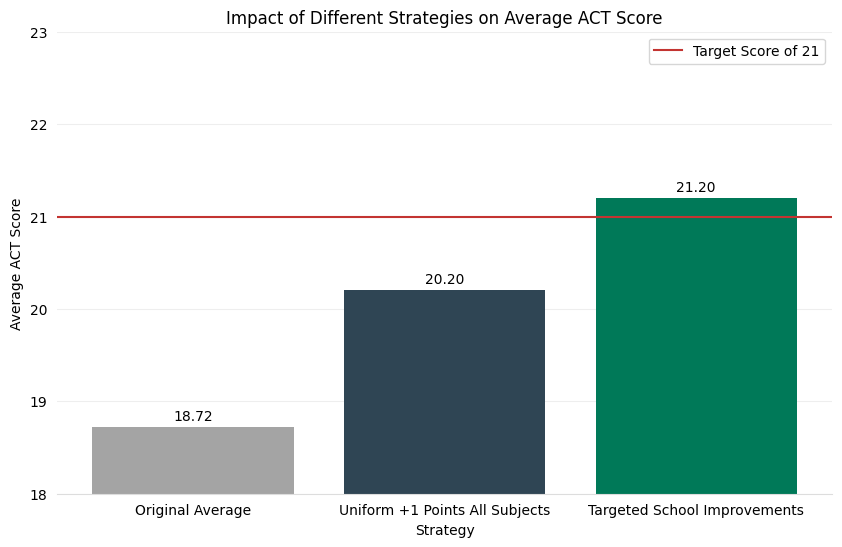

In [462]:
# Define the schools and their sweet spot increments
school_sweet_spots = sweet_spots

# Function to apply score increments and calculate the overall average
def calculate_overall_average(df, school_sweet_spots=None, uniform_increment=None):
    df_modified = df.copy()
    
    if school_sweet_spots:
        for school, increment in school_sweet_spots.items():
            for subject in coefficients.keys():
                condition = df_modified['School'] == school
                df_modified.loc[condition, subject] += increment
    
    if uniform_increment:
        for subject in coefficients.keys():
            df_modified[subject] += uniform_increment

    df_modified['Modified Composite'] = df_modified[['Highest English', 'Highest Mathematics', 'Highest Reading', 'Highest Science']].mean(axis=1)
    
    return df_modified['Modified Composite'].mean()

# Calculate the overall average with sweet spot increments
new_overall_avg_with_sweet_spots = calculate_overall_average(df, school_sweet_spots=school_sweet_spots)

# Calculate the overall average with a uniform 1-point increase in each subject
new_overall_avg_uniform_increase = calculate_overall_average(df, uniform_increment=1)

# Original average ACT score
original_avg_score = df['Highest Composite'].mean()

# Data for visualization
strategies = ['Original Average', 'Uniform +1 Points All Subjects', 'Targeted School Improvements']
average_scores = [original_avg_score, new_overall_avg_uniform_increase, new_overall_avg_with_sweet_spots]

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(strategies, average_scores, color=['#A4A4A4', '#2F4554', '#007958'])

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

# Horizontal line to show the target score
ax.axhline(y=21, color='#C33431', linestyle='-', label='Target Score of 21')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Title and labels
ax.set_title('Impact of Different Strategies on Average ACT Score')
ax.set_xlabel('Strategy')
ax.set_ylabel('Average ACT Score')
ax.set_ylim(18, 23)

plt.legend()
plt.show()